# Analysis of FreeSurfer data
The following notebook will analyze the metrics received from volume measurements in FreeSurfer.

### Imports

In [1]:
import pandas as pd
import numpy as np
import glob, sys, os, json, utils
import matplotlib.pyplot as plt

In [2]:
def plot_histogram(X, x_label, y_label, title, label):
    '''
    Plots histogram of a feature
    '''
    plt.hist(X, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

def get_data(csvFileName: str, ROI: []):
    '''
    The following function will sanitize data and build a numpy array with X ROI's volumes and y being the class [NC, PD]
    @csvFileName: input volumes csv
    @ROI: regions of interests desired
    '''
    df = pd.read_csv(csvFileName)
    df = utils.remove_unwanted_columns(df, ROI)
    df = utils.combine_left_right_vol(df)
        
    cols = list(df.columns.values)
    cols.pop(cols.index("subjectId"))
    df = df[["subjectId"]+cols]
    
    return df

In [8]:
ROI = [
    "subjectId", "initialHY", "followUpHY",
    "Left-Putamen", "Right-Putamen", 
    "Right-Caudate", "Left-Caudate", 
    "Right-Thalamus-Proper", "Left-Thalamus-Proper", 
    "Left-Pallidum", "Right-Pallidum", 
    "Left-Cerebellum-White-Matter", "Right-Cerebellum-White-Matter", 
    "Left-Cerebellum-Cortex", "Right-Cerebellum-Cortex",
    "3rd-Ventricle", 
    "4th-Ventricle",
    "Pons",
    "SCP",
    "Midbrain",
    "Insula",
    "Precentral Cortex",
    "group"
]
df = get_data("../data/volume-data/freeSurferVolumes.csv", ROI)
df

,subjectId,Pallidum,Putamen,Caudate,Thalamus-Proper,Cerebellum-Cortex,Cerebellum-White-Matter,3rd-Ventricle,4th-Ventricle,Pons,SCP,Midbrain,Insula,Precentral Cortex,group
0,3653,3371.2,7921.0,5937.7,11535.6,90705.2,24389.7,1359.7,1454.6,14782.351255,223.956388,5507.418376,11515,19803,0
1,3808,4107.5,8435.7,5795.8,14379.8,122310.6,34621.1,1988.2,2078.1,19281.923730,414.410048,7309.588981,15123,26678,0
2,4077,3492.6,9680.6,6077.7,13397.6,96912.0,25768.1,862.6,2061.4,15605.023062,224.569924,6060.309340,12291,27036,0
3,3838,3886.5,12452.7,7232.7,17360.1,98418.5,27164.3,1330.8,1764.2,15790.319743,309.250752,7002.026970,17047,35783,0
4,3068,3530.0,8921.6,8129.6,13607.1,109813.5,24579.1,2866.7,1977.7,16211.922345,284.042073,7016.588678,14146,24621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3557,4509.9,9951.4,7989.0,15730.2,113746.5,32995.4,1552.7,2013.0,17491.608770,291.027110,7011.172709,16289,25717,1
140,3167,3692.6,8999.2,6961.5,14749.3,110731.9,31584.1,790.2,1776.1,15433.882176,354.128580,5957.002062,12428,26644,1
141,115448,3641.8,9452.2,6374.1,13039.1,106682.4,24593.9,1161.7,1548.9,12596.867924,301.529898,5377.383783,15479,25223,1
142,3352,4571.1,9293.2,6747.1,16004.5,115332.4,33812.4,1093.2,1585.3,18207.561580,320.325328,7014.792288,13351,26733,1


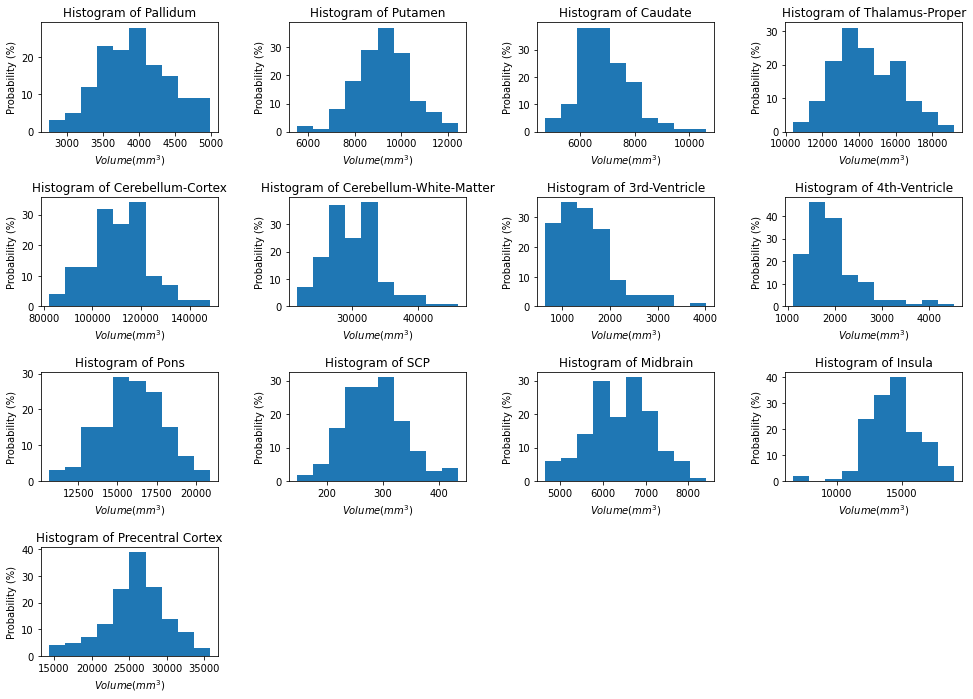

In [9]:
plt.figure(figsize=(16, 8)) 
index = 1
for column in df.columns[1:-1]:
    data = df[column].to_list()
    plt.subplot(4,4,index)
    plot_histogram(data, "$Volume (mm^{3}$)", "Probability (%)", f"Histogram of {column}", df.columns.to_list())
    index+=1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.6)